In [1]:
!pip install numpy
!pip install matplotlib

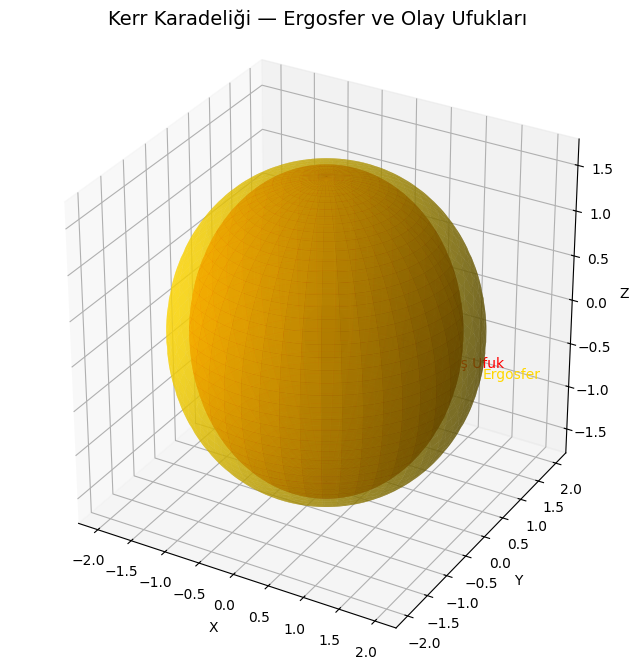

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Karadelik parametreleri
M = 1.0          # Kütle
a = 0.7          # Spin parametresi (|a| < M olmalı!)

# Küresel koordinatlar
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# --- Ergosfer yarıçapı ---
r_ergosphere = M + np.sqrt(M**2 - (a**2) * np.cos(theta)**2)

# --- Olay ufku yarıçapları ---
r_plus  = M + np.sqrt(M**2 - a**2)  # dış olay ufku
r_minus = M - np.sqrt(M**2 - a**2)  # iç olay ufku

# Koordinat dönüşümleri
def sph_to_cart(r):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# 3D koordinatlar
x_e, y_e, z_e = sph_to_cart(r_ergosphere)
x_outer, y_outer, z_outer = sph_to_cart(r_plus)
x_inner, y_inner, z_inner = sph_to_cart(r_minus)

# --- 3D Çizim ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ergosfer yüzeyi
ax.plot_surface(x_e, y_e, z_e, color='gold', alpha=0.6, label="Ergosfer")

# Dış olay ufku
ax.plot_surface(x_outer, y_outer, z_outer, color='red', alpha=0.8, label="Dış Olay Ufku")

# İç olay ufku
ax.plot_surface(x_inner, y_inner, z_inner, color='blue', alpha=0.8, label="İç Olay Ufku")

# Ayarlar
ax.set_title("Kerr Karadeliği — Ergosfer ve Olay Ufukları", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1, 1, 1])

# Lejant benzeri not
ax.text(2.2, 0, 0, "Ergosfer", color='gold')
ax.text(1.7, 0, 0, "Dış Ufuk", color='red')
ax.text(0.7, 0, 0, "İç Ufuk", color='blue')

plt.show()
